- 2021-05-05 [ADD] 두번째 유니콘기업 EDA (이해강)

# 원티드 프리온보딩 3팀 week1 (2차 EDA)
## 주제 : 유니콘 기업 데이터 속 분석할 변수의 기준 찾기 

In [39]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

# 경고메시지 오류 해결
import warnings
warnings.filterwarnings(action='ignore')

# matplotlib 한글 폰트 오류 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

In [14]:
df = pd.read_csv('유니콘 취합.csv',encoding='ansi')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      550 non-null    object 
 1   연매출액      550 non-null    int64  
 2   년도        550 non-null    int64  
 3   월         550 non-null    int64  
 4   월별_연금보험료  550 non-null    float64
 5   월별_직원수    550 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.9+ KB


In [20]:
ndf = df.pivot_table('연매출액','회사ID','년도')
ndf.columns = ndf.columns.map(lambda x : str(x))
ndf

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,32930316,47231240,67721259,105012384,210312756
쏘카,44800000,88240403,121086079,159424490,256671600
야놀자,29899218,33709355,54527868,73884856,151000000
에이프로젠,1823518,68032078,62178381,48100298,17857139
엘앤피코스메틱,188859253,396118457,315572296,314078749,178190156
옐로모바일,318200000,442800000,510500000,469900000,250700000
우아한형제들,49500000,84850263,162565237,311535460,561133434
지피클럽,22474017,48329929,49755792,513728710,448642100
쿠팡,1133752000,1915941000,2681390000,4347684000,7140720000


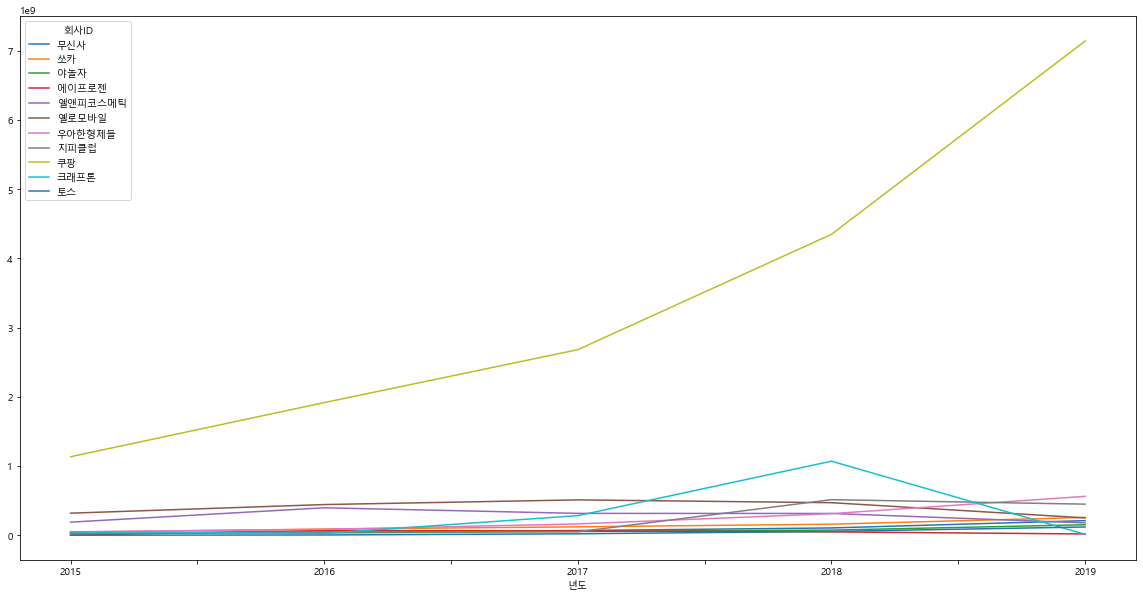

In [21]:
ndf.T.plot(figsize=(20,10))

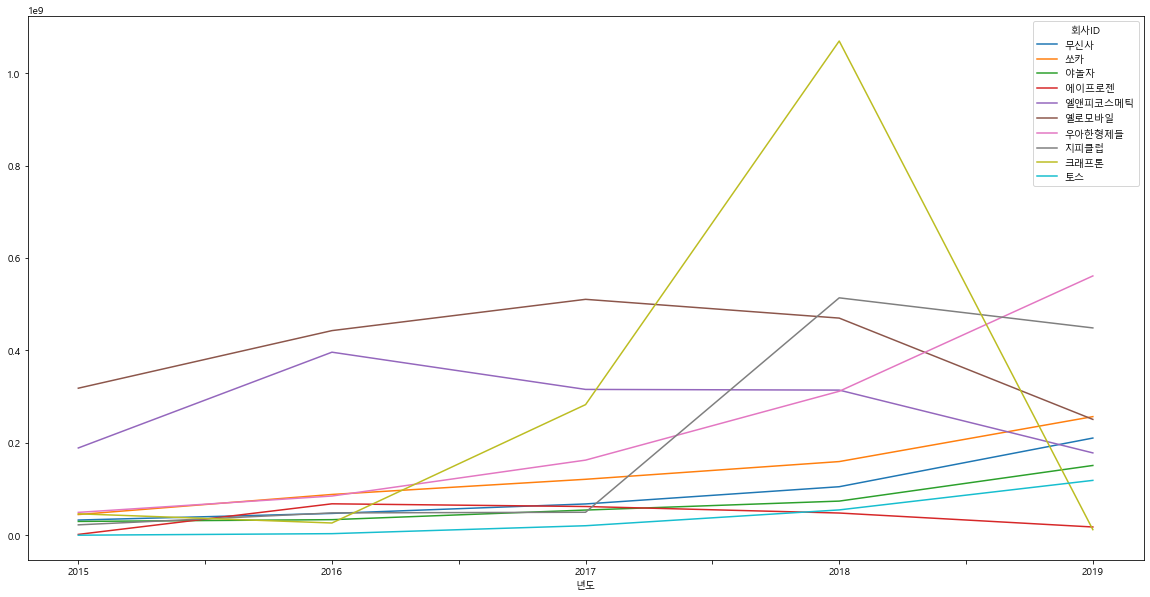

In [19]:
ndf[ndf.index != '쿠팡'].T.plot(figsize=(20,10))

In [50]:
ndf1 = ndf[:]
ndf1['15-16년 성장률'] = round(((ndf1['2016']-ndf1['2015'])/ndf1['2015'])*100, 1)
ndf1['16-17년 성장률'] = round(((ndf1['2017']-ndf1['2016'])/ndf1['2016'])*100, 1)
ndf1['17-18년 성장률'] = round(((ndf1['2018']-ndf1['2017'])/ndf1['2017'])*100, 1)
ndf1['18-19년 성장률'] = round(((ndf1['2019']-ndf1['2018'])/ndf1['2018'])*100, 1)

ndf1['평균 성장률'] = (ndf1['15-16년 성장률']+ndf1['16-17년 성장률']+ndf1['17-18년 성장률']+ndf1['18-19년 성장률'])/4
ndf1['가장 컸던 성장률'] = [100.3, 97.0, 104.4, 3630.8, 109.7, 39.2, 91.6, 932.5, 69.0, 965.9, 3371.2]
ndf1
#ndf1['평균 성장률'].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

년도,2015,2016,2017,2018,2019,15-16년 성장률,16-17년 성장률,17-18년 성장률,18-19년 성장률,평균 성장률,가장 컸던 성장률
회사ID,,,,,,,,,,,
무신사,32930316,47231240,67721259,105012384,210312756,43.4,43.4,55.1,100.3,60.550,100.3
쏘카,44800000,88240403,121086079,159424490,256671600,97.0,37.2,31.7,61.0,56.725,97.0
야놀자,29899218,33709355,54527868,73884856,151000000,12.7,61.8,35.5,104.4,53.600,104.4
에이프로젠,1823518,68032078,62178381,48100298,17857139,3630.8,-8.6,-22.6,-62.9,884.175,3630.8
엘앤피코스메틱,188859253,396118457,315572296,314078749,178190156,109.7,-20.3,-0.5,-43.3,11.400,109.7
옐로모바일,318200000,442800000,510500000,469900000,250700000,39.2,15.3,-8.0,-46.6,-0.025,39.2
우아한형제들,49500000,84850263,162565237,311535460,561133434,71.4,91.6,91.6,80.1,83.675,91.6
지피클럽,22474017,48329929,49755792,513728710,448642100,115.0,3.0,932.5,-12.7,259.450,932.5
쿠팡,1133752000,1915941000,2681390000,4347684000,7140720000,69.0,40.0,62.1,64.2,58.825,69.0


# 유니콘 기업들의 연평균 성장률

In [51]:
ndf1['평균 성장률'].mean() 

252.9227272727273

# 그렇지만 옐로모바일의 경우 4년동안의 연평균 성장률이 (-)를 기록함

In [52]:
ndf1['평균 성장률'].min()

-0.025000000000000355

# 유니콘 기업들의 가장 높았던 년성장률

In [53]:
ndf1['가장 컸던 성장률']

회사ID
무신사         100.3
쏘카           97.0
야놀자         104.4
에이프로젠      3630.8
엘앤피코스메틱     109.7
옐로모바일        39.2
우아한형제들       91.6
지피클럽        932.5
쿠팡           69.0
크래프톤        965.9
토스         3371.2
Name: 가장 컸던 성장률, dtype: float64

## 결론 : 즉, 유니콘 기업 선정에 있어 급격히 연매출액이 증가하는 시점이 존재하며,분석 데이터에 있어 연매출액 성장률로 잡을 수 있는 기준은 최소 39%.